# **ENDG 511 - Lab 1: Introduction to Deep Neural Networks using TensorFlow**

This colab notebook provides code and a framework for ***Lab 1***. You can work out your solutions here. The example in this lab was inspired by https://www.tensorflow.org/tutorials/quickstart/beginner, with some modifications and additions.


## Goals

In this lab, you will be introduced to the baiscs of TensorFlow and Keras, and you will learn how to use them to create deep learning models. The goals of this lab are:

- Understand the basic workflow for creating models in TensorFlow.
- Understand how to train TensorFlow models.
- Evaluate models in terms of accuracy, size and inference time.
- Understand how different model parameters can impact accuracy, size and inference time

## Layout
This lab is split into **two** parts. 
- **Part 1**: Run through the full example to gain familiarity with TensorFlow. And complete the exercises.
- **Part 2**: Convlutional Neural Netowrks Using TensorFlow. And complete the exercises.

# **Part 1**: Neural Network Machine Learning Model Using TensorFlow

This part of the lab demonstrates building and training a Neural Network to classify MNIST images. This tutorial uses TensorFlow and it is meant to give you a better understanding of how to build, train and evaluate machine learning models using TensorFlow.

### Import TensorFlow and Other Required Modules

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


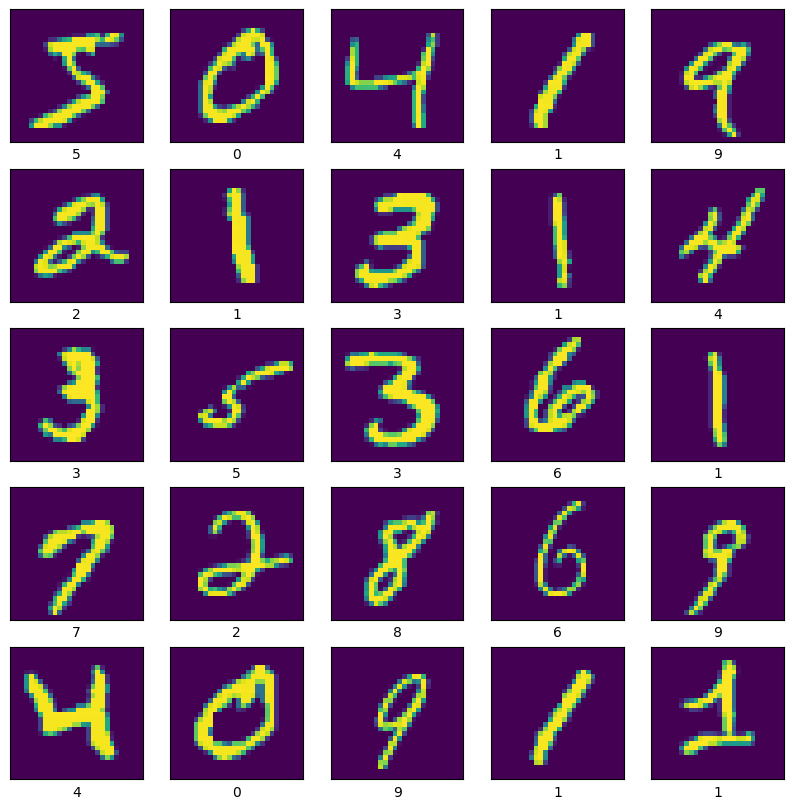

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build Machine Learning Model

***Sequential*** is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Let's display the architecture of our model:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Save and Load Model
Let us save and load the model before training. This allows us to save the randomized weights and biases and make more accurate comparisons. We will use the saved model in the exercise section.

In [6]:
# Save your model
model.save('part1_model.h5')

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\johns\Documents\EngineeringRepositories\ENDG511\lab-env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Compile and train the model

When compiling a model, an optimizer, a loss function and metrics need to be defined. 

- Optimizer: The Adam optimizer is the most popular optimizer and generally works well for classification and regression problems. It is based of gradient descent algorithms.
- Loss Function: The loss function is the function that computes the distance between the current output of the algorithm and the expected output. These functions need to be chosen depending on the application, the SparseCategoricalCrossentropy for example computes the crossentropy loss between the labels and predictions.
- Metrics: A metric is a function that is used to judge the performance of your model. This could be accuracy, mean squared error, cosine similarity or whatever metric works best for your use case.

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2948 - accuracy: 0.9143 - val_loss: 0.1381 - val_accuracy: 0.9578
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1431 - accuracy: 0.9573 - val_loss: 0.1071 - val_accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1084 - accuracy: 0.9676 - val_loss: 0.0929 - val_accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9732 - val_loss: 0.0734 - val_accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0750 - accuracy: 0.9761 - val_loss: 0.0739 - val_accuracy: 0.9788


### Plot accuracy and loss graphs

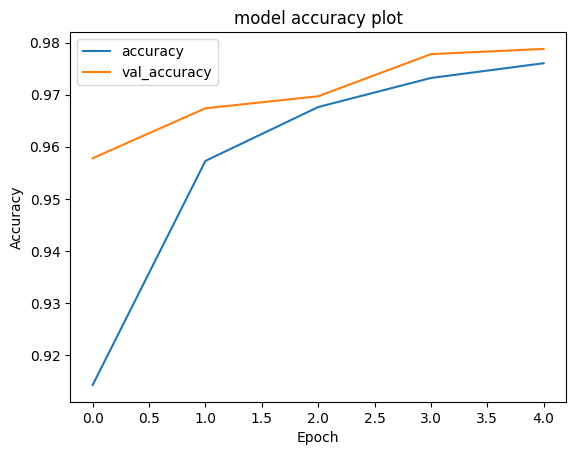

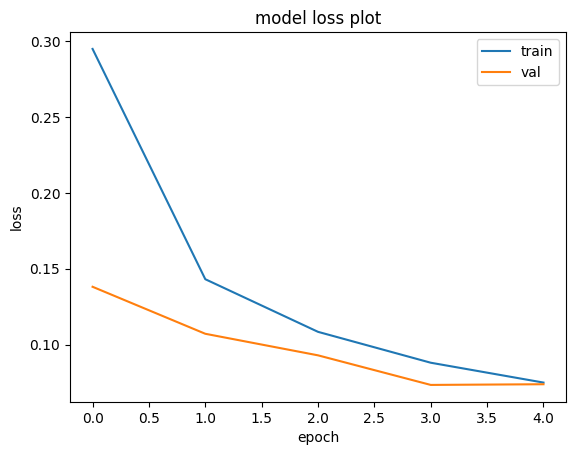

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
There are many metrics that can be used to evaluate a model. We will focus on three metrics for this lab:
1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [9]:
# Evaluate prediction accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0739 - accuracy: 0.9788 - 588ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 97.87999987602234 %
Model Size: 374865.00 bytes
Inference Time is 8.875775337219238e-05 s


### Excercies (2.5 points)


## **Question 1:** 
Load the untrained model. Change the learning rate to 1.5, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

## Loading the untrained model

In [17]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Changing the learning rate to 1.5

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1.5)
new_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = new_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 11.8474 - accuracy: 0.1103 - val_loss: 2.7464 - val_accuracy: 0.0974
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4542 - accuracy: 0.1022 - val_loss: 2.3646 - val_accuracy: 0.1032
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4451 - accuracy: 0.1010 - val_loss: 2.3664 - val_accuracy: 0.0958
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4530 - accuracy: 0.1011 - val_loss: 2.5793 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4673 - accuracy: 0.1005 - val_loss: 2.4213 - val_accuracy: 0.1009


## Generating the plots

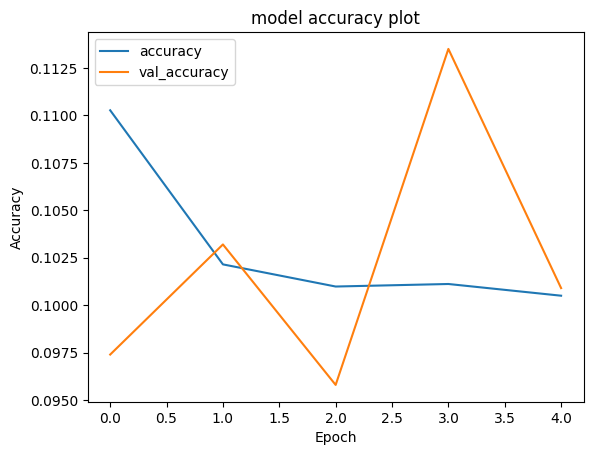

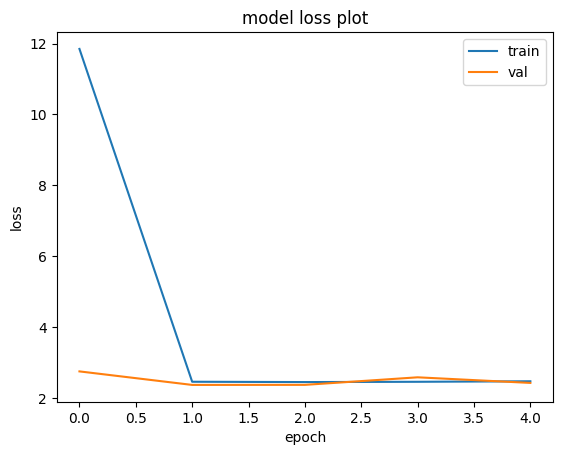

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

## Observations

With a learning rate of 1.5 it can be observed that the model has a low accuracy
towards the last epoch. A learning rate of 0.001 yeilds an accuracy in the margin
~0.91 to ~0.98 with general increasing trend towards the last epoch. However, 
a learning rate of 1.5 yeilds an accuracy in the margin ~0.0950 to ~0.1150 with 
fluctuations throughout the epochs. 

With a learning rate of 0.001 it can be observed that the model loss has a general 
decreasing trend within the margins of ~0.30 to ~0.09. However, with a learning 
rate of 1.5, it can be observed that the validation loss is somewhat static at 
~2.5 whereas the training loss decreases from ~12 to ~2.5

## **Question 2:** 
Load the untrained model. Change the learning rate to 0.0001, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

## Loading the untrained model

In [20]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Changing the learning rate to 0.0001

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
new_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = new_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6858 - accuracy: 0.8135 - val_loss: 0.3316 - val_accuracy: 0.9104
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3325 - accuracy: 0.9057 - val_loss: 0.2532 - val_accuracy: 0.9279
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.9230 - val_loss: 0.2144 - val_accuracy: 0.9395
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2310 - accuracy: 0.9344 - val_loss: 0.1899 - val_accuracy: 0.9459
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2056 - accuracy: 0.9411 - val_loss: 0.1696 - val_accuracy: 0.9518


## Generating the plots

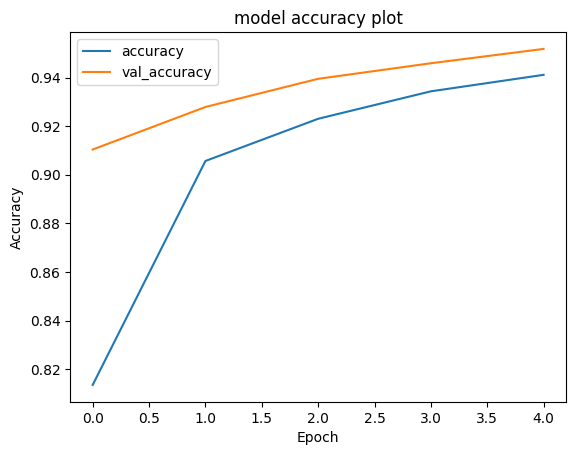

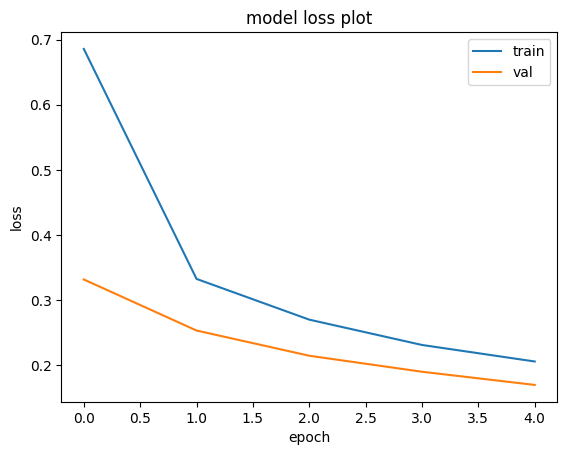

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

## Observations

With a learning rate of 0.0001, it can be observed that the model validation 
accuracy has an increasing trend from ~0.90 to ~0.95 and a model training accuracy 
with in increasing trend from ~0.81 to ~0.93 throughout the epochs.
In both cases, the accuracy for this learning rate is still lower than the accuracy
with a learning rate of 0.001 which yeilded an accuracy in the final epoch ~0.97-0.98.
A hypothesis to this result is that this learning rate does not provide too 
much changes in the model weights to reach the optimal weights that allow 
correct classifications of the images. 

There is a general decreasing trend in the loss for both training and validation. 
Training loss starts high in the first epochs at ~0.68 and ends with a loss of 
~0.22 at the last epoch. The validation loss starts at ~0.33 and ends with a loss
of ~0.10 at the last epoch. 

However, the loss of the 0.001 learning rate used prior was below 0.10 at the last epoch. 
Perhaps if the number of epochs is increased, this general decrease in the loss could
continue to match the loss observed with a learning rate that is 10x larger.

## **Question 3:** 
Rebuild the model with 8 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

## Rebuilding the model with 8 neurons

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Recompiling, Retraining, Saving

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Save your model
model.save('part1_model_8_neurons.h5')

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9450 - accuracy: 0.6842 - val_loss: 0.4402 - val_accuracy: 0.8827
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7073 - accuracy: 0.7624 - val_loss: 0.3877 - val_accuracy: 0.8898
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6664 - accuracy: 0.7763 - val_loss: 0.3726 - val_accuracy: 0.8956
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6387 - accuracy: 0.7854 - val_loss: 0.3503 - val_accuracy: 0.8978
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6144 - accuracy: 0.7920 - val_loss: 0.3539 - val_accuracy: 0.8990


c:\Users\johns\Documents\EngineeringRepositories\ENDG511\lab-env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Evaluation

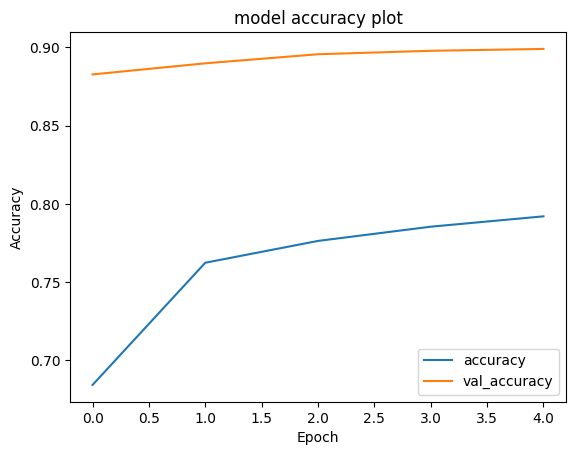

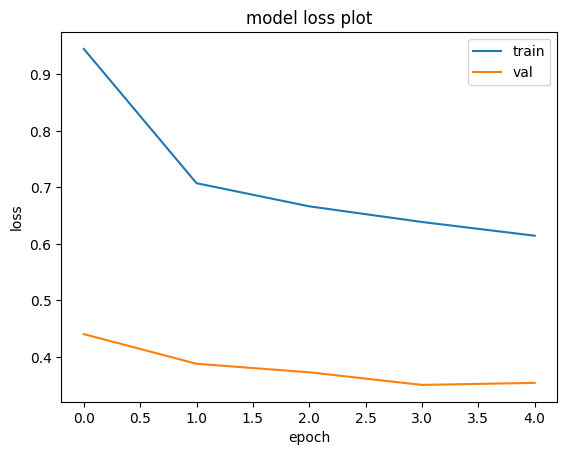

313/313 - 1s - loss: 0.3539 - accuracy: 0.8990 - 595ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 89.89999890327454 %
Model Size: 71306.00 bytes
Inference Time is 8.07196855545044e-05 s


In [25]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model_8_neurons.h5')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Evaluate prediction accuracy
test_loss, test_acc = new_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = new_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model_8_neurons.h5')))
print("Inference Time is", executionTime, "s")

## Observations

The original model had a model accuracy ~97.88%, a model size around 374.87KB,
and an inference time around 8.88 seconds. This model trained with 8 neurons,
16 times smaller, has a model accuracy ~89.90% a ~10% drop in accuracy. However, 
it is 71.31KB which is 5x smaller and an inference time ~8.07 seconds which is
~0.81 seconds faster.


## **Question 4:** 
Rebuild the model with 2048 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

## Rebuilding the model with 2048 neurons.

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 2048)              1607680   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                20490     
                                                                 
Total params: 1628170 (6.21 MB)
Trainable params: 1628170 (6.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Recompiling, Retraining, Saving

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Save your model
model.save('part1_model_2048_neurons.h5')

Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1909 - accuracy: 0.9426 - val_loss: 0.1077 - val_accuracy: 0.9658
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0871 - accuracy: 0.9729 - val_loss: 0.0835 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0629 - accuracy: 0.9801 - val_loss: 0.0702 - val_accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.0733 - val_accuracy: 0.9785
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0393 - accuracy: 0.9866 - val_loss: 0.0747 - val_accuracy: 0.9806


c:\Users\johns\Documents\EngineeringRepositories\ENDG511\lab-env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Evaluation

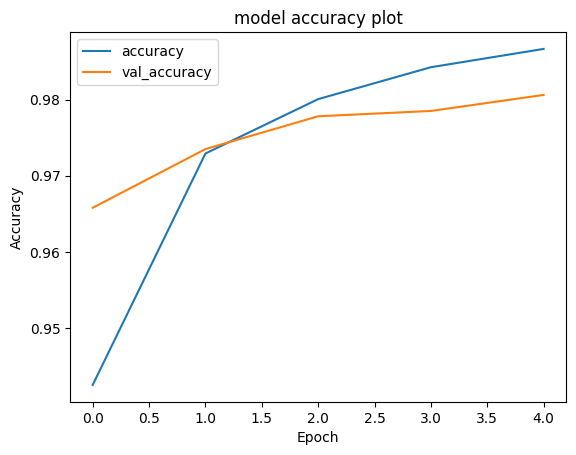

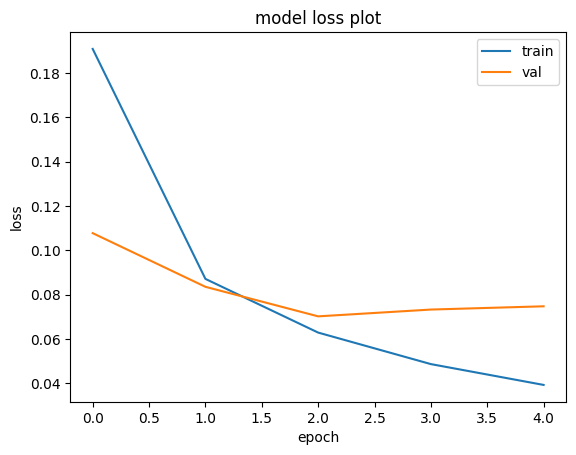

313/313 - 1s - loss: 0.0747 - accuracy: 0.9806 - 1s/epoch - 4ms/step
313/313 [==============================] - 1s 3ms/step

Model Accuracy: 98.05999994277954 %
Model Size: 16919572.00 bytes
Inference Time is 0.00013836686611175538 s


In [28]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model_2048_neurons.h5')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Evaluate prediction accuracy
test_loss, test_acc = new_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = new_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model_2048_neurons.h5')))
print("Inference Time is", executionTime, "s")

## Observations
Model Accuracy: 97.87999987602234 %
Model Size: 374865.00 bytes
Inference Time is 8.875775337219238e-05 s

The original model with 128 neurons had an accuracy of ~97.88%, a size of ~374.87KB,
and an inference time of ~8.88 seconds. The new model built with 2048 neurons
has a ~0.20% increase in accuracy at ~98.01%. However more neurons means a larger
model and there was 45x increase in model size with 2048 neurons at ~16.92MB. 
Furthermore, the new model is substantially faster running at 0.14ms which is
~64000 times faster. 

# **Part 2**: Convlutional Neural Netowrks Using TensorFlow

### Introduction:

Convolutional Neural Networks (CNN) are distinguished by their ability to identify patterns and features in images (e.g. edges, lines, circles or even objects). CNN's are widely adopted in computer vision applications and found success in audio signals and text. 


A typical Convolutional neural network is composed mainly of three types of layers:

* **Convolutional layer:** The core building block of a CNN, which consists of Filters or kernels to detect features. Generally, the first convolutional layers detect simple features (e.g. edges) and later layers identify objects. 
* **Pooling layer:** Reduces the spatial size of the feature maps so having fewer learnable weights and less computation cost.
* **Fully-connected layer:**  Known as the output layer, where the last identified feature maps are flattened and connected to dense layers for the classification task.



### Import TensorFlow and Other Required Modules

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset
Similar to Part 1, loading the MNIST dataset and performing normalization to improve the training performance and speed.

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Build Machine Learning Model
In this part, we will build the LeNet-5 CNN model, one of the earliest CNN architectures proposed by Yann LeCun and others for recognizing handwritten and machine-printed characters.

The LeNet-5 architecture cosisits of 2 convolutional layers, 2 pooling layers and fully connected layers as shown in the figure below.

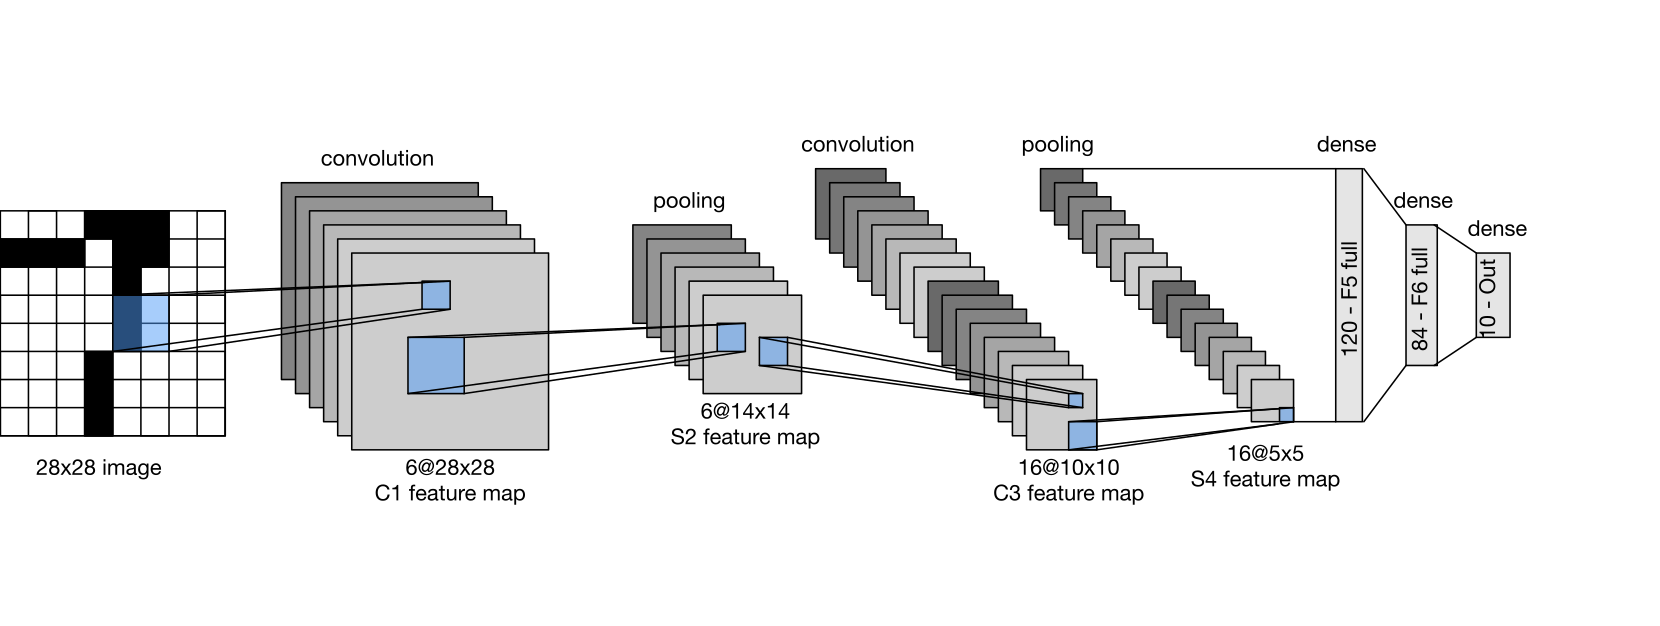

[Image Source](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html#img-lenet)

In [3]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
lenet_5_model.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
lenet_5_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=1, activation = 'relu'))
#Pooling layer 2 
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(120, activation='relu'))
lenet_5_model.add(layers.Dense(84, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               

c:\Users\johns\Documents\EngineeringRepositories\ENDG511\lab-env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Compile and train the model


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2358 - accuracy: 0.9291 - val_loss: 0.0693 - val_accuracy: 0.9780
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.0572 - val_accuracy: 0.9805
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0440 - val_accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0352 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0320 - val_accuracy: 0.9894


### Plot accuracy and loss graphs

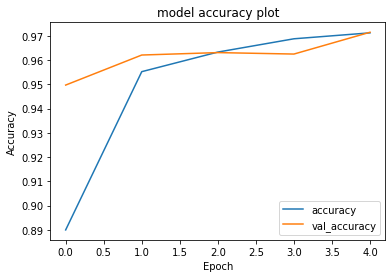

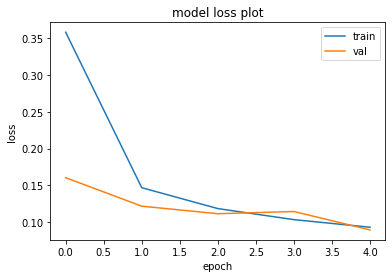

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [ ]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 2s - loss: 0.0305 - accuracy: 0.9899 - 2s/epoch - 6ms/step
313/313 [==============================] - 2s 7ms/step

Model Accuracy: 98.989999294281 %
Model Size: 138077.00 bytes
Inference Time is 0.0002658099174499512 s


## Excercises: (2.5 points)
Q1: Briefly compare the Fully connected (FC) model in part 1 and the CNN model in part 2 in terms of the model size, accuracy and inference time.**(0.5 point)**


---




 



Q2: Modify the two convolutional layers of the LeNet-5 stride value into 2 and discuss the effect on the model size and accuracy. If the perfromance is affected, explain the reason? **(0.5 point)**


Q3: Replace the average-pooling layer with a max-pooling layer for the LeNet-5 CNN model and discuss the effect on the trained model size and accuracy.**(0.5 point)**


Q4: IoT devices are limited in storage and computation resources. Therefore lightweight machine-learning or compressed models are ideal for IoT edge devices. 

In this exercise, you will modify the LeNet-5 CNN model on the MNIST dataset to reduce its size as much as possible (expecting less than 13k parameters) while maintaining inference accuracy equal to or above 95%. There is no limitation to the applied modifications. You may modify the number of filters, filter size, stride value, fully connected layers etc.**(1 point)**
